# Topic 27: K-Nearest Neighbors<br> +Topic 32: Pipelines

onl01-dtsc-ft-022221
05/10/21

### Learning Objectives:


- Understand the different distance metrics
- Understand how K-Nearest Neighbors works 
- Review the KNN with Scikit Learn Lab together 
- Introduce using `Pipeline`s for Preprocessing and Modeling
    - Add Pipelines to the Knn with Scikit learn lab.
    - [If there's time:] adding the `ColumnTransformer` for all preprocessing.


## Questions

- 

## Announcements

- **Blog Posts due end of day today.**
- **Any remaining phase 3 project edits need to be turned in by end of today.**


- Phase 3 Project has been unlocked for those who want to start looking for datasets. 
    - Must have 10 feature columns  (pre-encoding)
    - Must have >1,000 rows.
    - Must not be from a lesson/lab.
    - Needs approval by me.

# Distance Metrics

- K-nearest neighbors is a distance-based model. 
- There are multiple ways of calculating distance. 

### Manhattan Distance

<img src ="https://raw.githubusercontent.com/learn-co-students/dsc-distance-metrics-online-ds-ft-100719/master/images/manhattan_fs.png" width=40%>


$$ \large d(x,y) = \sum_{i=1}^{n}|x_i - y_i | $$  
> - "The right side of the equals sign means "calculate the absolute number of units you move in each distinct dimension, and then sum them all up"."
- "The  $\Sigma$  just means "the cumulative sum of each step". In a given step, you take a dimension, and then look at the corresponding values for that dimension on point X and point Y. 
- You then compute the absolute value of the difference between them by subtracting Y's value for that dimension from X's value for that dimension, and then add it to our total."

### Euclidian

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-distance-metrics-online-ds-ft-100719/master/images/euclidean_fs.png" width=20%>

 The equation at the heart of this one is probably familiar to you: $a^2 + b^2 = c^2$, or the **_Pythagorean theorem_**
 
 $$ \large d(x,y) = \sqrt{\sum_{i=1}^{n}(x_i - y_i)^2} $$  


### Minkowski

- A generalized distance metric across a _Normed Vector Space_.
> - "A Normed Vector Space"= a collection of space where each point has been processed by a function (any function, as long it meets two criteria:)<br><br>1. the zero vector (just a vector filled with zeros) will output a length of 0, and<br>
    2. every other vector must have a positive length 

$$\large d(x, y) = \left(\sum_{i=1}^{n}|x_i - y_i|^c\right)^\frac{1}{c}$$  


> **Both the Manhattan and Euclidean distances are actually _special cases of Minkowski distance_.**
- Manhattan Distance: 
    - c = 1
- Euclidean Distance:
    - c = 2


# K Nearest Neighbors

- Supervised Learning
- Classification OR regression.


### Predicting the Class for the Red Dot
<img src="https://raw.githubusercontent.com/learn-co-students/dsc-distance-metrics-online-ds-pt-100719/master/images/knn_fs.png" width=50%>


## Get the classes of the K closest points to use as predictions
- Each neighbor "votes" on which class the unknown point belongs to. 

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-finding-the-best-value-for-k-onl01-dtsc-pt-041320/master/images/best_k_fs.png" width=50%>

#### How KNN "Voting" works

<img src="https://raw.githubusercontent.com/learn-co-curriculum/dsc-k-nearest-neighbors/master/images/knn.gif" width=60%>

### Finding the Best K Using Elbow Plots

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-finding-the-best-value-for-k-onl01-dtsc-pt-041320/master/images/plot_fs.png" width=50%>

# Activity Part 1: Walk through KNN with scikit-learn - Lab 


- [Lab Repo](https://github.com/learn-co-curriculum/dsc-k-nearest-neighbors-lab)
> - Let's walk through the solution code before updating it with our own code.


## Introduction

In this lab, you'll learn how to use scikit-learn's implementation of a KNN classifier on the classic Titanic dataset from Kaggle!
 

## Objectives

In this lab you will:

- Conduct a parameter search to find the optimal value for K 
- Use a KNN classifier to generate predictions on a real-world dataset 
- Evaluate the performance of a KNN model  


## Getting Started

Start by importing the dataset, stored in the `titanic.csv` file, and previewing it.

In [6]:
# Your code here
# Import pandas and set the standard alias 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Import the data from 'titanic.csv' and store it in a pandas DataFrame 
raw_df = pd.read_csv('titanic.csv')

# Print the head of the DataFrame to ensure everything loaded correctly 
raw_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Great!  Next, you'll perform some preprocessing steps such as removing unnecessary columns and normalizing features.

## Preprocessing the data

Preprocessing is an essential component in any data science pipeline. It's not always the most glamorous task as might be an engaging data visual or impressive neural network, but cleaning and normalizing raw datasets is very essential to produce useful and insightful datasets that form the backbone of all data powered projects. This can include changing column types, as in: 


```python
df['col_name'] = df['col_name'].astype('int')
```
Or extracting subsets of information, such as: 

```python
import re
df['street'] = df['address'].map(lambda x: re.findall('(.*)?\n', x)[0])
```

> **Note:** While outside the scope of this particular lesson, **regular expressions** (mentioned above) are powerful tools for pattern matching! See the [regular expressions official documentation here](https://docs.python.org/3.6/library/re.html). 

Since you've done this before, you should be able to do this quite well yourself without much hand holding by now. In the cells below, complete the following steps:

1. Remove unnecessary columns (`'PassengerId'`, `'Name'`, `'Ticket'`, and `'Cabin'`) 
2. Convert `'Sex'` to a binary encoding, where female is `0` and male is `1` 
3. Detect and deal with any missing values in the dataset:  
    * For `'Age'`, replace missing values with the median age for the dataset  
    * For `'Embarked'`, drop the rows that contain missing values
4. One-hot encode categorical columns such as `'Embarked'` 
5. Store the target column, `'Survived'`, in a separate variable and remove it from the DataFrame  

In [7]:
# Drop the unnecessary columns
drop_cols =['PassengerId', 'Name', 'Ticket', 'Cabin']
df = raw_df.drop(columns=drop_cols)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
# Convert Sex to binary encoding
df['Sex'] = df['Sex'].map({'male':0,'female':1})
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [9]:
# Find the number of missing values in each column
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [10]:
# Impute the missing values in 'Age'
df['Age'] = df['Age'].fillna( df['Age'].median() )
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [11]:
# Drop the rows missing values in the 'Embarked' column
df = df.dropna(subset=['Embarked'])
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [12]:
# One-hot encode the categorical columns
one_hot_df = pd.get_dummies(df,columns=['Embarked'], drop_first=True)
one_hot_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,0,1
1,1,1,1,38.0,1,0,71.2833,0,0
2,1,3,1,26.0,0,0,7.9250,0,1
3,1,1,1,35.0,1,0,53.1000,0,1
4,0,3,0,35.0,0,0,8.0500,0,1


In [13]:
# Assign the 'Survived' column to labels
labels = one_hot_df['Survived'].copy()

# Drop the 'Survived' column from one_hot_df
one_hot_df.drop('Survived',axis=1,inplace=True)

## Create training and test sets

Now that you've preprocessed the data, it's time to split it into training and test sets. 

In the cell below:

* Import `train_test_split` from the `sklearn.model_selection` module 
* Use `train_test_split()` to split the data into training and test sets, with a `test_size` of `0.25`. Set the `random_state` to 42 

In [14]:
# Import train_test_split 
from sklearn.model_selection import train_test_split


# Split the data
X_train, X_test, y_train, y_test = train_test_split(one_hot_df,labels,
                                                    test_size=0.25, 
                                                    random_state=42)

[print(var.shape) for var in [X_train,X_test]]

(666, 8)
(223, 8)


[None, None]

## Normalizing the data

The final step in your preprocessing efforts for this lab is to **_normalize_** the data. We normalize **after** splitting our data into training and test sets. This is to avoid information "leaking" from our test set into our training set (read more about data leakage [here](https://machinelearningmastery.com/data-leakage-machine-learning/) ). Remember that normalization (also sometimes called **_Standardization_** or **_Scaling_**) means making sure that all of your data is represented at the same scale. The most common way to do this is to convert all numerical values to z-scores. 

Since KNN is a distance-based classifier, if data is in different scales, then larger scaled features have a larger impact on the distance between points.

To scale your data, use `StandardScaler` found in the `sklearn.preprocessing` module. 

In the cell below:

* Import and instantiate `StandardScaler` 
* Use the scaler's `.fit_transform()` method to create a scaled version of the training dataset  
* Use the scaler's `.transform()` method to create a scaled version of the test dataset  
* The result returned by `.fit_transform()` and `.transform()` methods will be numpy arrays, not a pandas DataFrame. Create a new pandas DataFrame out of this object called `scaled_df`. To set the column names back to their original state, set the `columns` parameter to `one_hot_df.columns` 
* Print the head of `scaled_df` to ensure everything worked correctly 

In [15]:
# Import StandardScale
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns=one_hot_df.columns)
scaled_df_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0.815528,1.390655,-0.575676,-0.474917,-0.480663,-0.500108,-0.311768,0.620174
1,-0.386113,1.390655,1.550175,-0.474917,-0.480663,-0.435393,-0.311768,0.620174
2,-0.386113,-0.719086,-0.120137,-0.474917,-0.480663,-0.644473,-0.311768,0.620174
3,-1.587755,-0.719086,-0.120137,-0.474917,-0.480663,-0.115799,-0.311768,0.620174
4,0.815528,1.390655,-1.107139,0.413551,-0.480663,-0.356656,-0.311768,-1.612452


In [19]:
scaled_df_train.describe().round(2).loc[['min','max']]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
min,-1.59,-0.72,-2.21,-0.47,-0.48,-0.64,-0.31,-1.61
max,0.82,1.39,3.83,6.63,6.88,9.56,3.21,0.62


In [20]:
scaled_df_train['Embarked_Q'].value_counts()

-0.311768    607
 3.207512     59
Name: Embarked_Q, dtype: int64

You may have noticed that the scaler also scaled our binary/one-hot encoded columns, too! Although it doesn't look as pretty, this has no negative effect on the model. Each 1 and 0 have been replaced with corresponding decimal values, but each binary column still only contains 2 values, meaning the overall information content of each column has not changed.

## Fit a KNN model

Now that you've preprocessed the data it's time to train a KNN classifier and validate its accuracy. 

In the cells below:

* Import `KNeighborsClassifier` from the `sklearn.neighbors` module 
* Instantiate the classifier. For now, you can just use the default parameters  
* Fit the classifier to the training data/labels
* Use the classifier to generate predictions on the test data. Store these predictions inside the variable `test_preds` 

In [21]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNeighborsClassifier
clf = KNeighborsClassifier()

# Fit the classifier
clf.fit(scaled_df_train,y_train)

# Predict on the test set
test_preds = clf.predict(scaled_data_test)

In [25]:
# clf.coef_

## Evaluate the model

Now, in the cells below, import all the necessary evaluation metrics from `sklearn.metrics` and complete the `print_metrics()` function so that it prints out **_Precision, Recall, Accuracy, and F1-Score_** when given a set of `labels` (the true values) and `preds` (the models predictions). 

Finally, use `print_metrics()` to print the evaluation metrics for the test predictions stored in `test_preds`, and the corresponding labels in `y_test`. 

In [22]:
# Your code here 
# Import the necessary functions
from sklearn import metrics

In [23]:
# Complete the function
def print_metrics(labels, preds, report=False,both=False):
    """modified version of solution code function"""
    if (report==False) | (both==True):
        print("Precision Score: {}".format(metrics.precision_score(labels,preds)))
        print("Recall Score: {}".format(metrics.recall_score(labels,preds)))
        print("Accuracy Score: {}".format(metrics.accuracy_score(labels,preds)))
        print("F1 Score: {}".format(metrics.f1_score(labels,preds)))
    if both:
        print()
    if (report==True) | (both==True): 
        print(metrics.classification_report(labels,preds))
        
print_metrics(y_test, test_preds,both=True)

Precision Score: 0.7058823529411765
Recall Score: 0.7317073170731707
Accuracy Score: 0.7892376681614349
F1 Score: 0.718562874251497

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       141
           1       0.71      0.73      0.72        82

    accuracy                           0.79       223
   macro avg       0.77      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



> Interpret each of the metrics above, and explain what they tell you about your model's capabilities. If you had to pick one score to best describe the performance of the model, which would you choose? Explain your answer.

Write your answer below this line: 


________________________________________________________________________________




## Improve model performance 

While your overall model results should be better than random chance, they're probably mediocre at best given that you haven't tuned the model yet. For the remainder of this notebook, you'll focus on improving your model's performance. Remember that modeling is an **_iterative process_**, and developing a baseline out of the box model such as the one above is always a good start. 

First, try to find the optimal number of neighbors to use for the classifier. To do this, complete the `find_best_k()` function below to iterate over multiple values of K and find the value of K that returns the best overall performance. 

The function takes in six arguments:
* `X_train`
* `y_train`
* `X_test`
* `y_test`
* `min_k` (default is 1)
* `max_k` (default is 25)
    
> **Pseudocode Hint**:
1. Create two variables, `best_k` and `best_score`
1. Iterate through every **_odd number_** between `min_k` and `max_k + 1`. 
    1. For each iteration:
        1. Create a new `KNN` classifier, and set the `n_neighbors` parameter to the current value for k, as determined by the loop 
        1. Fit this classifier to the training data 
        1. Generate predictions for `X_test` using the fitted classifier 
        1. Calculate the **_F1-score_** for these predictions 
        1. Compare this F1-score to `best_score`. If better, update `best_score` and `best_k` 
1. Once all iterations are complete, print the best value for k and the F1-score it achieved 

In [26]:
## Code together in SG
def find_best_k(X_train,y_train,X_test,y_test, min_k =1 , max_k = 25):
    
    best_k = 0 
    best_score = 0
    
    for k in range(min_k, max_k+1,2):
        clf = KNeighborsClassifier(n_neighbors=k)
        clf.fit(X_train, y_train)
        
        y_hat_test = clf.predict(X_test)
        f1 = metrics.f1_score(y_test,y_hat_test)
        
        if f1 > best_score:
            best_k = k
            best_score = f1
    print(f"Best k = {best_k}")
    print(f"Best f1={best_score}")
    
    


In [27]:
find_best_k(scaled_data_train, y_train, scaled_data_test, y_test)
# Expected Output:

# Best Value for k: 17
# F1-Score: 0.7468354430379746

Best k = 17
Best f1=0.7468354430379746


## Study Group Addition:

### Let's Evaluate this best-k model with our function!

In [44]:
## Make a model with the best_k
clf = KNeighborsClassifier(n_neighbors=17)
clf.fit(scaled_data_train, y_train)

y_hat_test = clf.predict(scaled_data_test)

In [45]:
## Modified version of our simple eval function from Topic 25 Part 2 Study Group
# - Added X_train and y_train for if we want scores for both train and test
def evaluate_classification(model, X_test_tf,y_test,cmap='Reds',
                            normalize='true',classes=None,figsize=(8,4),
                            X_train = None, y_train = None,):
    """Evaluates a scikit-learn binary classification model."""
    

    
    y_hat_test = model.predict(X_test_tf)
    print(metrics.classification_report(y_test, y_hat_test,target_names=classes))
    
    fig,ax = plt.subplots(ncols=2,figsize=figsize)
    metrics.plot_confusion_matrix(model, X_test_tf,y_test,cmap=cmap, 
                                  normalize=normalize,display_labels=classes,
                                 ax=ax[0])
    
    curve = metrics.plot_roc_curve(model,X_test_tf,y_test,ax=ax[1])
    curve.ax_.grid()
    curve.ax_.plot([0,1],[0,1],ls=':')
    fig.tight_layout()
    plt.show()
    
    ## Add comparing Scores if X_train and y_train provided.
    if (X_train is not None) & (y_train is not None):
        print(f"Training Score = {model.score(X_train,y_train):.2f}")
        print(f"Test Score = {model.score(X_test_tf,y_test):.2f}")

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       141
           1       0.78      0.72      0.75        82

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.80       223
weighted avg       0.82      0.82      0.82       223



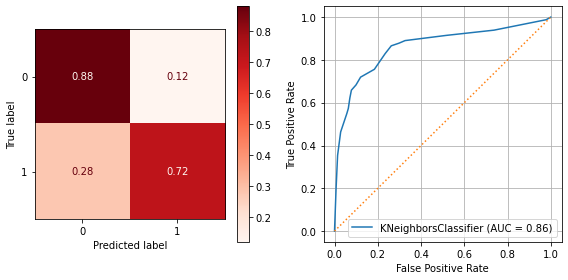

Training Score = 0.84
Test Score = 0.82


In [46]:
## evaluate with our function.
evaluate_classification(clf,scaled_data_test,y_test,X_train=scaled_data_train,
                       y_train=y_train,normalize='true')

If all went well, you'll notice that model performance has improved by 3 percent by finding an optimal value for k. For further tuning, you can use scikit-learn's built-in `GridSearch()` to perform a similar exhaustive check of hyperparameter combinations and fine tune model performance. For a full list of model parameters, see the [sklearn documentation !](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

___

## Level Up: Iterating on the data

As an optional (but recommended!) exercise, think about the decisions you made during the preprocessing steps that could have affected the overall model performance. For instance, you were asked to replace the missing age values with the column median. Could this have affected the overall performance? How might the model have fared if you had just dropped those rows, instead of using the column median? What if you reduced the data's dimensionality by ignoring some less important columns altogether?

In the cells below, revisit your preprocessing stage and see if you can improve the overall results of the classifier by doing things differently. Consider dropping certain columns, dealing with missing values differently, or using an alternative scaling function. Then see how these different preprocessing techniques affect the performance of the model. Remember that the `find_best_k()` function handles all of the fitting; use this to iterate quickly as you try different strategies for dealing with data preprocessing! 
___

# Activity Part 2: KNN with scikit-learn - Lab with `Pipelines`! 

## Adding `GridSearchCV` to select best parameters

<!-- - [Distance Metrics](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html) -->
- Use `GridSearchCV` to check for the best_k before adding additional hyperparameters to try.

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn import set_config

In [ ]:
## Check Params taken by model
KNeighborsClassifier()

In [34]:
## Make ks to try
list(range(1,26,2))

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]

In [36]:
## Create a params grid and init a GridSearchCV using scoring='f1'.
params = {'n_neighbors':list(range(1,26,2))}
grid = GridSearchCV(KNeighborsClassifier(), params, scoring='f1')
grid

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25]},
             scoring='f1')

In [39]:
## Fit grid and display best_params_
grid.fit(scaled_data_train,y_train)
print(grid.score(scaled_data_test,y_test))
grid.best_params_

0.718562874251497


{'n_neighbors': 5}

In [40]:
## Check out the best_estimator_
best_clf = grid.best_estimator_
best_clf

KNeighborsClassifier()

In [41]:
## write a quick gridsearch evaluation function

def eval_best_model(grid,X_test,y_test,X_train=None,y_train=None):
    print('The best parameters were:')
    print("\t",grid.best_params_)
    
    model = grid.best_estimator_    

    print('\n[i] Classification Report')
    evaluate_classification(model, X_test,y_test,X_train=X_train,y_train=y_train)

The best parameters were:
	 {'n_neighbors': 5}

[i] Classification Report
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       141
           1       0.71      0.73      0.72        82

    accuracy                           0.79       223
   macro avg       0.77      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



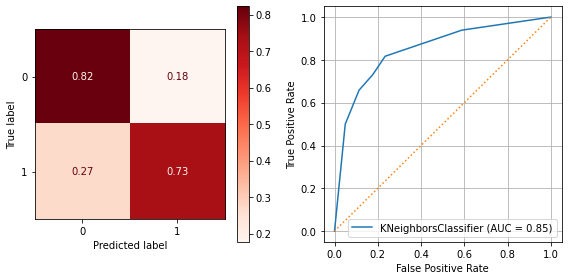

Training Score = 0.87
Test Score = 0.79


In [43]:
## Use eval function on grid
eval_best_model(grid,scaled_data_test,y_test,X_train=scaled_data_train,
                       y_train=y_train)

<AxesSubplot:xlabel='n_neighbors'>

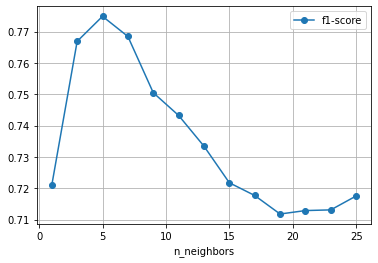

In [51]:
## Visualize results for K's
# Get .cv_results
cv_results = grid.cv_results_

res_df = pd.DataFrame({'n_neighbors':cv_results['param_n_neighbors'].tolist(),
             'f1-score':cv_results['mean_test_score']})
res_df.set_index('n_neighbors').plot(grid=True,marker='o')

### Adding more params to gridsearch


- Try metric = ['euclidean','manhattan','minkowski']
- Try p=[1,2]

In [ ]:
KNeighborsClassifier()

In [4]:
### Adding more params to gridsearch and fit plus eval


> Trying adding weights = ['uniform', 'distance']}

The best parameters were:
	 {'metric': 'euclidean', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

[i] Classification Report
              precision    recall  f1-score   support

           0       0.83      0.80      0.82       141
           1       0.68      0.72      0.70        82

    accuracy                           0.77       223
   macro avg       0.75      0.76      0.76       223
weighted avg       0.77      0.77      0.77       223



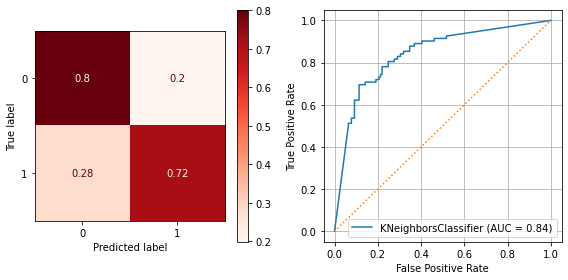

Training Score = 0.98
Test Score = 0.77


In [52]:
### Adding more params to gridsearch
params = {'n_neighbors':list(range(1,26,2)),
         'p':[1,2],
         'metric':['euclidean','manhattan','minkowski'],
         'weights':['uniform', 'distance']}
grid = GridSearchCV(KNeighborsClassifier(), params,scoring='f1')

grid.fit(scaled_df_train,y_train)
eval_best_model(grid,scaled_data_test,y_test,scaled_data_train, y_train)

## Adding `Pipeline`s to gridsearch scaling methods

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import set_config


In [55]:
## Make a pipeline with a StandardScaler, and KNeighborsClassifier
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('knn',KNeighborsClassifier())
])
pipeline

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [58]:
## you can vis your pipelines as interactive diagrams
set_config(display='text')
pipeline

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

- To GridSearch a parameter for a model/object inside a pipeline, we need to use the names of the steps in the pipeline's `.named_steps_`

In [57]:
## Check named steps
pipeline.named_steps

{'scaler': StandardScaler(), 'knn': KNeighborsClassifier()}

- To use a param grid, we use add the step name as a prefix followed by a dunder (`__`) followed the by the param name.
    - So `n_neighbors` becomes `knn__n_n eighbors` 

The best parameters were:
	 {'knn__metric': 'euclidean', 'knn__n_neighbors': 5, 'knn__p': 1, 'knn__weights': 'uniform', 'scaler': StandardScaler()}

[i] Classification Report
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       141
           1       0.71      0.73      0.72        82

    accuracy                           0.79       223
   macro avg       0.77      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



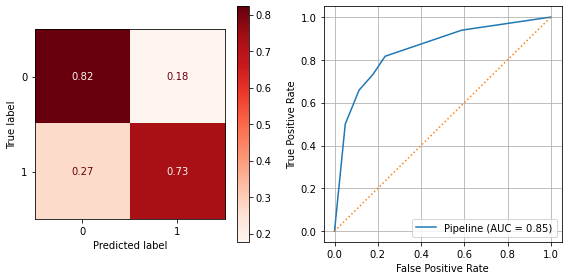

Training Score = 0.87
Test Score = 0.79


In [63]:
### Copy gridsearch code and change the params for pipeline
## add scaler options: StandardScaler() and MinMaxScaler

params = {'knn__n_neighbors':list(range(1,26,2)),
         'knn__p':[1,2],
         'knn__metric':['euclidean','manhattan','minkowski'],
         'knn__weights':['uniform', 'distance'],
         'scaler':[StandardScaler(),MinMaxScaler()]}

grid = GridSearchCV(pipeline, params,scoring='f1')

grid.fit(X_train,y_train)
eval_best_model(grid,X_test,y_test,X_train, y_train)

___
## Summary

Well done! In this lab, you worked with the classic Titanic dataset and practiced fitting and tuning KNN classification models using scikit-learn! As always, this gave you another opportunity to continue practicing your data wrangling skills and model tuning skills using Pandas and scikit-learn!

# Appendix/Preview

## Next Class- using `Pipelines` with the `ColumnTransformer`

In [ ]:
# Import pandas and set the standard alias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn import metrics
from sklearn.model_selection import GridSearchCV


## New Imports
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
# Import the data from 'titanic.csv' and store it in a pandas DataFrame 
# raw_df = fs.datasets.load_titanic(read_csv_kwds={'index_col':0})
raw_df = pd.read_csv('https://raw.githubusercontent.com/learn-co-curriculum/dsc-knn-with-scikit-learn-lab/master/titanic.csv')
raw_df.drop(columns= ['PassengerId', 'Name', 'Ticket', 'Cabin'],
            inplace=True)

# Print the head of the DataFrame to ensure everything loaded correctly 
df = raw_df.copy()
df

In [ ]:
## Get X, y and train-test-split
target = 'Survived'
X = df.drop(columns=target).copy()
y = df[target].copy()


## train tst split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25,
                                                    random_state=42)
[print(var.shape) for var in [X_train, X_test]];

## Preprocessing with Pipelines + Column Transformer

- [Pipeline Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)

### Required Preprocessing

> Since you've done this before, you should be able to do this quite well yourself without much hand holding by now. In the cells below, complete the following steps:
1. ~~Remove unnecessary columns (`'PassengerId'`, `'Name'`, `'Ticket'`, and `'Cabin'`) ~~
2. Convert `'Sex'` to a binary encoding, where female is `0` and male is `1` 
3. Detect and deal with any missing values in the dataset:  
    * For `'Age'`, replace missing values with the median age for the dataset  
    * For `'Embarked'`, drop the rows that contain missing values
4. One-hot encode categorical columns such as `'Embarked'` 
5. Store the target column, `'Survived'`, in a separate variable and remove it from the DataFrame  

> #### Normalizing the data 
* Import and instantiate `StandardScaler` 
* Use the scaler's `.fit_transform()` method to create a scaled version of the training dataset  
* Use the scaler's `.transform()` method to create a scaled version of the test dataset  
* The result returned by `.fit_transform()` and `.transform()` methods will be numpy arrays, not a pandas DataFrame. Create a new pandas DataFrame out of this object called `scaled_df`. To set the column names back to their original state, set the `columns` parameter to `one_hot_df.columns` 
* Print the head of `scaled_df` to ensure everything worked correctly 

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline

### Preprocess Numeric Columns

In [ ]:
## Get list of numeric features to sacle
# target='Survived'
num_cols = X_train.select_dtypes('number').columns.tolist()
num_cols

In [ ]:
## Create a num_trasnformer pipeline 
## that will impute using median and then calculate z-scores
num_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scale',StandardScaler())])

In [ ]:
## .fit_transform X_train
X_train_tf = num_transformer.fit_transform(X_train[num_cols])
X_test_tf = num_transformer.transform(X_test[num_cols])
X_train_tf

#### Categorical Features


In [ ]:
## Get list of cat features to encode
cat_cols = X_train.select_dtypes('O').columns.tolist()
cat_cols

In [ ]:
## Create a cat_transformer pipeline 
## that will impute using median and then calculate z-scores
cat_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value='missing')),
    ('encoder',OneHotEncoder(sparse=False,handle_unknown='ignore'))])

In [ ]:
## Fit-transform data
X_train_cat =cat_transformer.fit_transform(X_train[cat_cols])
X_test_cat =cat_transformer.transform(X_test[cat_cols])

X_train_cat 

 ##  Putting it all together with `ColumnTransformer`



- [ColumnTransformer Documentation](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html)

In [ ]:
from sklearn.compose import ColumnTransformer,make_column_transformer
# from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector
from sklearn import set_config
set_config(display='diagram')

In [ ]:
## Display Pipelines from earlier
num_transformer

In [ ]:
## COMBINE BOTH PIPELINES INTO ONE WITH COLUMN TRANSFORMER
preprocessing=ColumnTransformer(transformers=[
    ('num',num_transformer,num_cols),
    ('cat',cat_transformer,cat_cols)])
preprocessing

### Viewing Pipeline

In [ ]:
from sklearn import set_config
set_config(display='diagram')

preprocessing

In [ ]:
## Get X_train and X_test from column transformer
X_train_tf = preprocessing.fit_transform(X_train)
X_test_tf = preprocessing.transform(X_test)

In [ ]:
X_train_tf

### Finding Feature Names

In [ ]:
set_config(display='text')
preprocessing

In [ ]:
## Explore the named_transformers
preprocessing.named_transformers_

In [ ]:
## Slice out the 'cat' transformer and inspect .named_steps
preprocessing.named_transformers_['cat'].named_steps

In [ ]:
## Slice out the 'encoder' from the cat transformers' named_steps
preprocessing.named_transformers_['cat'].named_steps['encoder']

In [ ]:
## Use the encoder's .get_feature_names
feature_names = preprocessing.named_transformers_['cat'].\
                named_steps['encoder'].get_feature_names(cat_cols).tolist()
feature_names

In [ ]:
## Find the encoder inside the cat transformer
X_cols = num_cols+feature_names
X_cols

In [ ]:
## Use the encoder.get_feature_names()
X_train_df = pd.DataFrame(X_train_tf,columns=X_cols,index=X_train.index)
X_test_df = pd.DataFrame(X_test_tf,columns=X_cols,index=X_test.index)
X_train_df

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# from yellowbrick.contrib.classifier import DecisionViz
